# Gary Kelly - C16380531
## Data Visualization Assignment: ATP and WTA tournament dataset (Storyboard)

In [1]:
#install.packages("dplyr")
#install.packages("treemap")
#install.packages("maps")
#install.packages("ggplot2")
#install.packages("reshape2")

In [2]:
library(dplyr)
library(treemap)
library(maps)
library(ggplot2)
library(reshape2)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'treemap' was built under R version 3.6.3"Warning message:
"package 'maps' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"

In [3]:
#Read in Datasets
FullTournaments = read.csv('Data/fulltournaments.csv',header=TRUE, sep=",")

head(FullTournaments,3)
nrow(FullTournaments)
str(FullTournaments)

Location,Tournament,Type.x,Tournament.ID,Best.of,Court,Tier,Surface,AvgPts,AvgRank,...,MinRank,startDate,endDate,prizeMoney,prizeMoneyCurrency,city,lat,lng,country,population
's-Hertogenbosch,Rosmalen Grass Court Championships,WTA,94,3,Outdoor,International,Grass,1186,85,...,214,2020-06-08,2020-06-14,251750,USD,â€™s-Hertogenbosch,51.6833,5.3167,Netherlands,134520
's-Hertogenbosch,Rosmalen Grass Court Championships,ATP,33,3,Outdoor,ATP250,Grass,1060,61,...,224,2020-06-08,2020-06-14,735790,EUR,â€™s-Hertogenbosch,51.6833,5.3167,Netherlands,134520
Antwerp,European Open,ATP,60,3,Indoor,ATP250,Hard,923,83,...,243,2020-10-19,2020-10-25,735790,EUR,Antwerp,51.2204,4.4150,Belgium,920000


[1] 106

'data.frame':	106 obs. of  22 variables:
 $ Location          : Factor w/ 82 levels "'s-Hertogenbosch",..: 1 1 2 3 4 4 5 6 7 7 ...
 $ Tournament        : Factor w/ 91 levels "Abierto Mexicano Mifel",..: 68 68 24 6 4 4 57 76 15 15 ...
 $ Type.x            : Factor w/ 2 levels "ATP","WTA": 2 1 1 1 1 2 1 1 1 2 ...
 $ Tournament.ID     : int  94 33 60 43 4 67 24 63 57 118 ...
 $ Best.of           : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Court             : Factor w/ 2 levels "Indoor","Outdoor": 2 2 1 2 2 2 2 1 2 2 ...
 $ Tier              : Factor w/ 8 levels "ATP250","ATP500",..: 4 1 1 1 1 4 2 2 2 7 ...
 $ Surface           : Factor w/ 3 levels "Clay","Grass",..: 2 2 3 3 3 3 1 3 3 3 ...
 $ AvgPts            : int  1186 1060 923 856 970 1258 1737 1973 2004 2507 ...
 $ AvgRank           : int  85 61 83 81 69 74 54 36 58 33 ...
 $ NumRounds         : int  5 5 5 5 5 5 6 5 5 6 ...
 $ MinPoints         : int  266 220 192 34 56 308 152 500 57 379 ...
 $ MinRank           : int  214 224 243 405 360 190 

# American hard court tournaments have best payouts

### Graph 1: Treemap

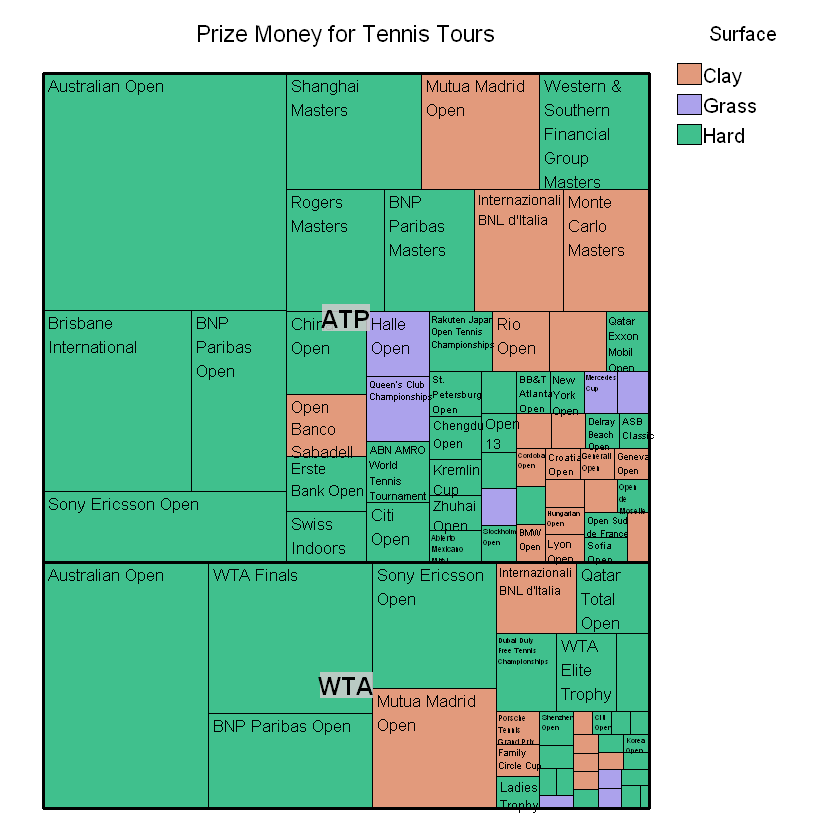

In [4]:
## Aligning the labels##
treemap(FullTournaments,index = c("Type.x","Tournament"),
         vSize ="prizeMoney", vColor = "Surface",type="categorical",
         title = "Prize Money for Tennis Tours",fontsize.labels = c(15,10),
         align.labels = list(c("centre","centre"),c("left","top")))

The above treemap shows a breakdown of pize money on both the ATP and WTA tours. As can be seen the ATP has a larger prize fund than the WTA tour. In both tours the Australian Open has the largest prize fund. In addition to showing the breakdown between each tour, the treemap also shows a breakdown between court surfaces with hard court having the majority of high paying events, followed by clay and lastly grass. 

These results are not entirely accurate as currently, as a result of the current pandemic, a lot of events such as wimbledon have been suspended and as a result the website currently has the prize fund set at $0 which affects the spread of the treemap.

### Graph 2: Overview of Tournament Locations

Warning message:
"Removed 1 rows containing missing values (geom_point)."

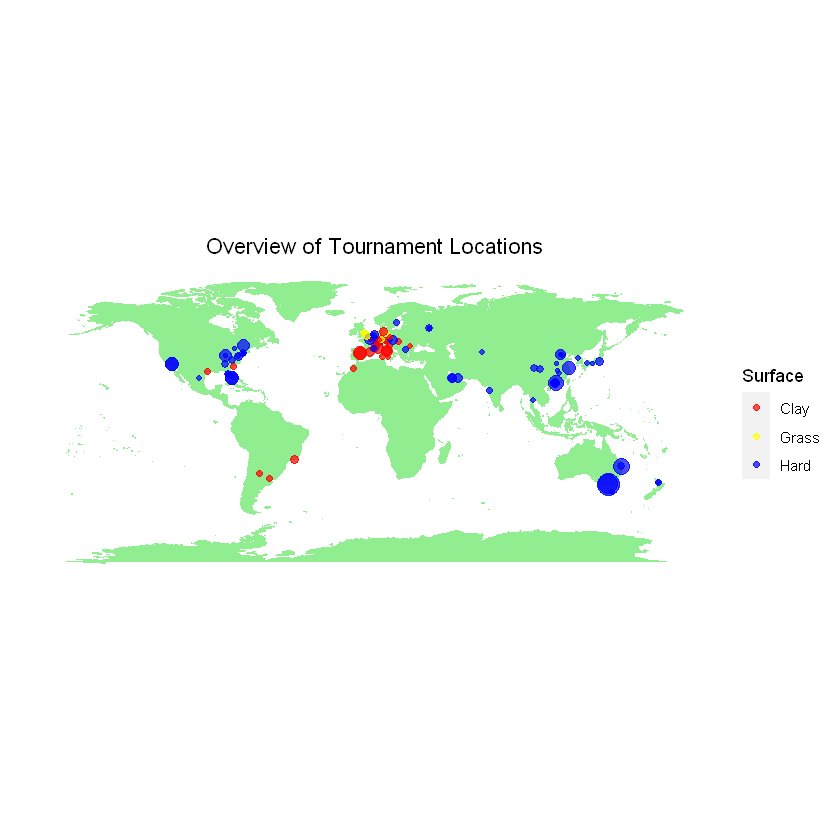

In [5]:
world_map <- map_data("world")

#Creat a base plot with gpplot2
p <- ggplot() + coord_fixed() +
  xlab("") + ylab("")

#Add map to base plot
base_world <- p + geom_polygon(data=world_map, aes(x=long, y=lat, group=group), 
                               colour="light green", fill="light green")

#Strip map down to make it look cleaner
cleanup <- 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        panel.background = element_rect(fill = 'white', colour = 'white'), 
        axis.line = element_line(colour = "white"), 
        axis.ticks=element_blank(), axis.text.x=element_blank(),
        axis.text.y=element_blank())

#Apply cleanup
base_world <- base_world + cleanup

#Add data points to map with value affecting size
map_data_sized <- 
  base_world +
  geom_point(data=FullTournaments, 
             aes(x=lng, y=lat, size=prizeMoney, color=factor(Surface)), alpha=I(0.7)) +
  labs(title = "Overview of Tournament Locations") +
  theme(plot.title = element_text(hjust = 0.5))

map_data_sized + scale_color_manual(name="Surface", 
                        labels = c("Clay", 
                                   "Grass", 
                                   "Hard"), 
                        values = c("Clay"="red", 
                                   "Grass"="yellow", 
                                   "Hard"="blue")) + scale_size_continuous(name = "Prize Money", guide = FALSE) 

The above graph gives a brief overview of the location of the various tournaments, their surface type and prize money. Looking at the above graph we can see that the main clusters of tournaments are in the east cast of the United States, Central Europen and Eastern Asia. In addition to this as was shown in the Treemap in graph 1, the Australian Open is the largest prize money Tournament held in Melbourne. 

This graph also shows us that many of the tournaments which use the same surface are often grouped together eg East United States and East Asia use hard court whereas Central Europe use clay and grass.

As was discovered in our introductory graphs these court surfaces have a seasonal relationship so by using this information an up-and-coming tennis player can plan what dates he should be in which continent for in order to play the most tournaments.

### Graph 3: Prize Money vs Average Points

Loading required package: scales
`geom_smooth()` using formula 'y ~ x'


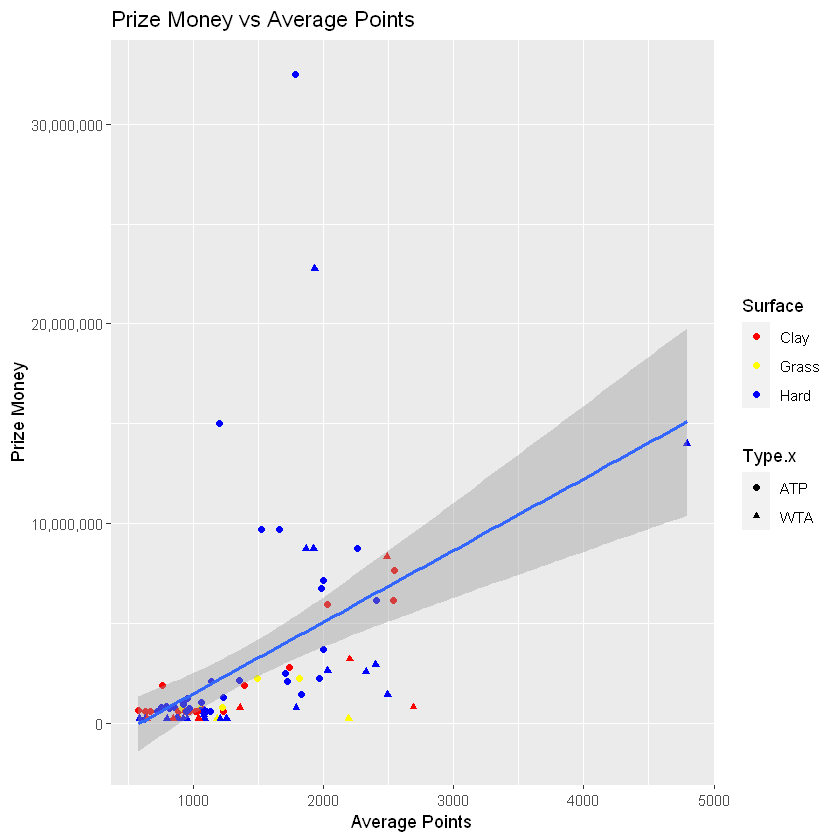

In [6]:
require(scales)
prizes <- FullTournaments %>% filter(prizeMoney != 0)

ggplot(data = prizes, mapping = aes(x = AvgPts, y=prizeMoney)) + 
geom_point(aes(col=Surface, shape =Type.x)) + geom_smooth(method="lm") + 
ggtitle("Prize Money vs Average Points") + xlab("Average Points") + ylab("Prize Money")  + scale_y_continuous(labels = comma)  + scale_color_manual(name="Surface", 
                        labels = c("Clay", 
                                   "Grass", 
                                   "Hard"), 
                        values = c("Clay"="red", 
                                   "Grass"="yellow", 
                                   "Hard"="blue"))

The above graph shows the relationship between tournament prize money and the tournamens competitors average rank points. The relationship is roughly linear. This graph demonstrates the process that will be used in the following graphs to determine which tournaments are the best to play. By finding the ratio of prize money to average points for each tournament, we can use this information to identify the best tournaments to play financially. In the above graph we can see that the tournament with the highest prize money (Australian Open) also only has an average ran points of roughly 1700. This is a very good ratio as can be seen with its position on the graph. 

### Graph 4: Best Tournaments to Play

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


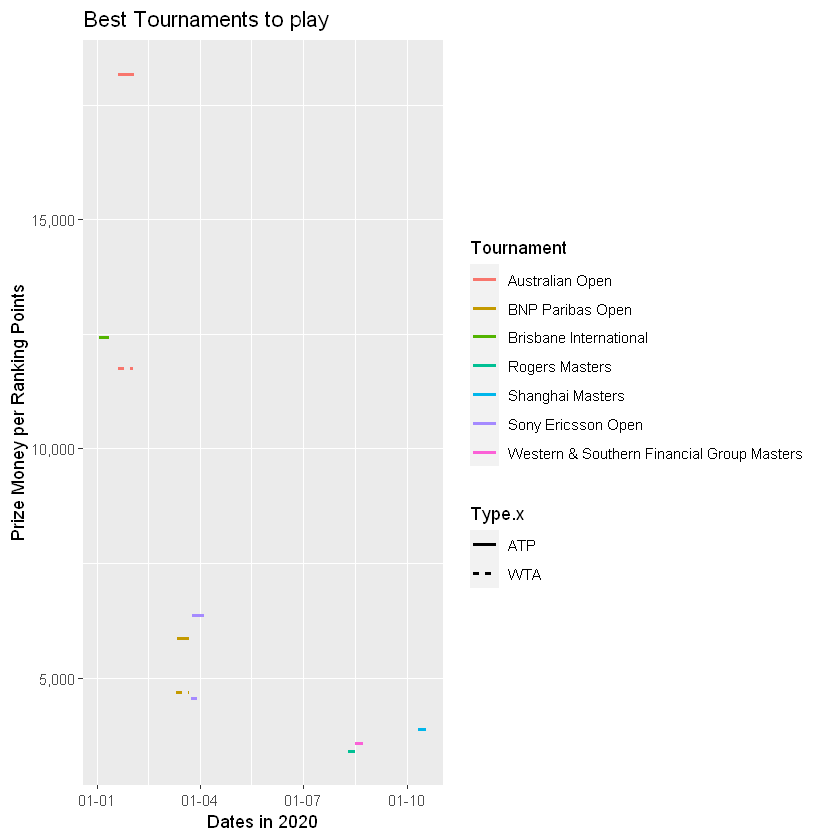

In [7]:
ppp <- FullTournaments %>% mutate(prizePerPoint = round(prizeMoney / AvgPts))
dates <- ppp 
top5 <- dates %>% top_n(10, prizePerPoint)

top5$startDate <- as.Date(top5$startDate, format = "%Y-%m-%d")
top5$endDate <- as.Date(top5$endDate, format = "%Y-%m-%d")


ggplot(transform(top5, y=order(Tournament, startDate)),
       aes(x=startDate, xend=endDate, y=prizePerPoint, yend=prizePerPoint)) + 
  geom_segment(aes(col=Tournament, linetype=Type.x), size = 1) +
  scale_y_discrete(breaks=NULL)+ 
ggtitle("Best Tournaments to play") + xlab("Dates in 2020") + ylab("Prize Money per Ranking Points")  + scale_y_continuous(labels = comma) + scale_x_date(labels = date_format("%d-%m"))


The above graph plots the 10 best tournament in terms of prize money per average points. The dates of each tournament can be seen on the x-axis and the prize money per average rank points can be seen on the y-axis. As can be seen in the graph the Australian open and Brisbane international have the two highest prize per rank values. Many of these high paying tournaments are on back to back or close together such as:

    Brisbane -> Australian Open
    BNP Paribas Open -> Sony Ericsson Open
    Rogers Masters -> Western and Southern Financial Group Masters
    
Folllowing from this graph the next graph will analyse the locations of these best tournaments and determine where would be the best place to play in order to maximize prize money.

### Graph 5 + 6: Best Tournaments World / USA

Warning message:
"Removed 4 rows containing missing values (geom_point)."Warning message:
"Removed 4 rows containing missing values (geom_text)."

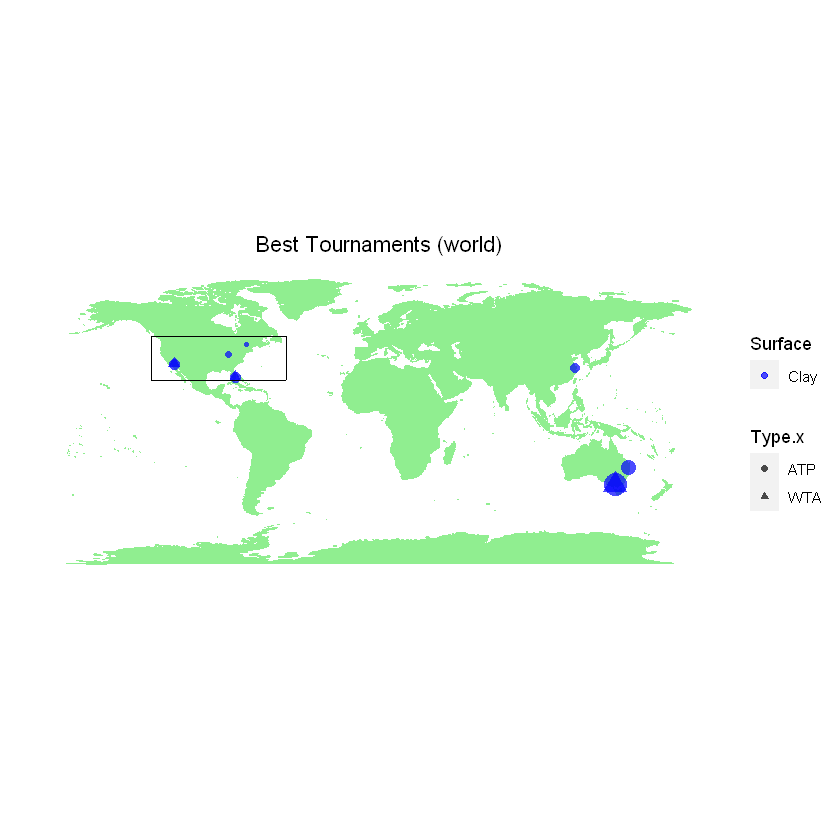

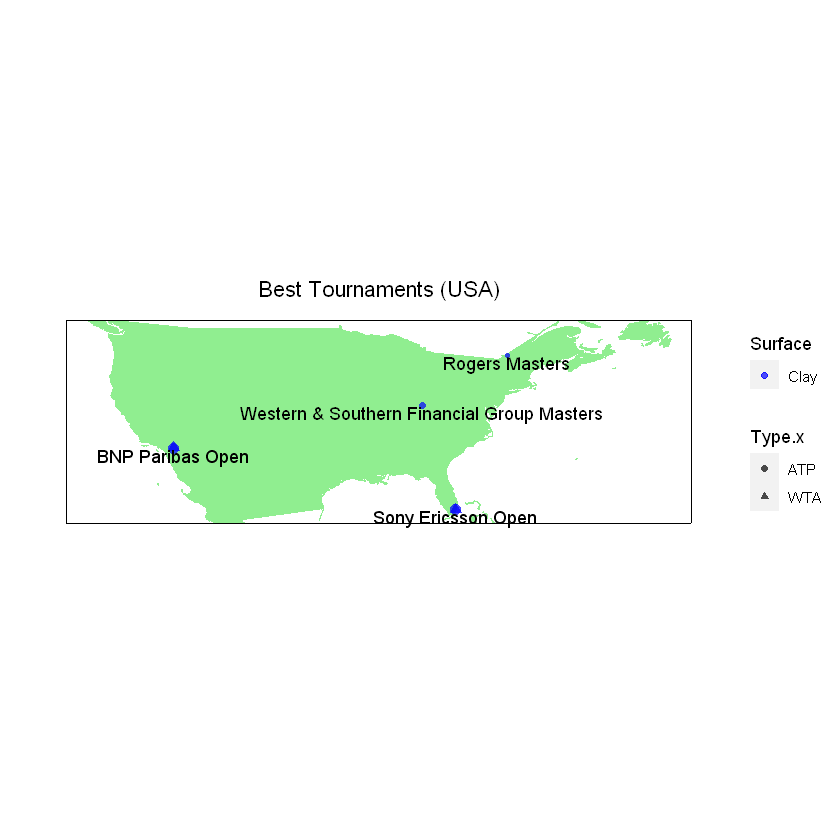

In [8]:
#Add data points to map with value affecting size
map_data_sized <- 
  base_world +
  geom_point(data=top5, 
             aes(x=lng, y=lat, size=prizeMoney, colour=Surface, shape = Type.x), alpha=I(0.7))+
    labs(title = "Best Tournaments (world)", color = "Court Surface") + scale_size_continuous(name = "Prize Money", guide = FALSE) +
  theme(plot.title = element_text(hjust = 0.5))  + 
geom_segment(aes(x=-130, xend=-130, y=24, yend=50))  + 
geom_segment(aes(x=-50, xend=-50, y=24, yend=50)) + 
geom_segment(aes(x=-130, xend=-50, y=24, yend=24)) + 
geom_segment(aes(x=-130, xend=-50, y=50, yend=50))  + scale_color_manual(name="Surface", 
                        labels = c("Clay", 
                                   "Grass", 
                                   "Hard"), 
                        values = c("Clay"="red", 
                                   "Grass"="yellow", 
                                   "Hard"="blue"))

map_data_sized

map_data_sized + xlim(-130,-50) + ylim(24,50) + geom_text(data=top5, aes(x=lng, y=lat,label = Tournament,vjust = 1))+
    labs(title = "Best Tournaments (USA)")

The above graphs show the location of the best prize per points tournaments in the world followed by a closer look at the american tournaments. The first graph shows the tournaments are best paying tournaments are spread amongst USA, Australia and Eastern Asia. As the majority of the tournaments are held in the USA, the scond graph takes a closer look at the USA and which tournaments are being held there. 

The second graph shows the four best paying American tournaments. As seen in graph 4, these tournaments can be divided into pairs with the following tournaments taking place relatively close to each other: 

    BNP Paribas Open -> Sony Ericsson Open
    Rogers Masters -> Western and Southern Financial Group Masters
    
In summary by playing these four tournaments, up-and-coming tennis players can save money on international flights and maximize their chances of winning and securing a big payday. 